# Большой проект по обработке и визуализации данных

## Обзор

Вы планируете посмотреть какой-то фильм. Можете ли Вы доверять онлайн-рейтингам и отзывам о фильмах? *Особенно* если та компания, которая занимается рейтингами и отзывами, *также* зарабатывает на продаже билетов на фильмы. Есть ли у таких компаний тенденция выдавать завышенные или заниженные рейтинги?

### Цель проекта:

**Цель проекта - выполнить шаги по мотивам статьи на сайте fivethirtyeight.com о рейтингах и посмотреть, сможем ли мы прийти к тем же выводам, которые приведены в статье. Необходимо определить, предоставляла ли компания Fandango завышенные рейтинги в 2015 году для того, чтобы продавать больше билетов.**

---

---
----

## Часть 1: Исследуем данные


Статья, по мотивам которой строится наш проект: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**

----



### Данные

Исходные данные для статьи [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) находятся в свободном доступе по следующей ссылке на github: https://github.com/fivethirtyeight/data. Это два csv-файла. В одном файле данные о рейтингах от компании Fandango, а в другом файле агрегированные данные о рейтингах от других компаний, таких как Metacritic, IMDB и Rotten Tomatoes.

#### all_sites_scores.csv

-----

Файл `all_sites_scores.csv` содержит все фильмы, для которых есть рейтинг Rotten Tomatoes, рейтинг RT User, оценка Metacritic, оценка Metacritic User и оценка IMDb, а также как минимум 30 отзывов от фанатов на Fandango. Данные Fandango были выгружены 24 августа 2015.

Колонка | Определение
--- | -----------
FILM | Название фильма
RottenTomatoes | Оценка "Rotten Tomatoes Tomatometer" для этого фильма
RottenTomatoes_User | Оценка "Rotten Tomatoes user" для этого фильма
Metacritic | Оценка "Metacritic" для этого фильма
Metacritic_User | Оценка "Metacritic user" для этого фильма
IMDB | Оценка "IMDb user" для этого фильма
Metacritic_user_vote_count | Количество голосов за этот фильм от пользователей Metacritic
IMDB_user_vote_count | Количество голосов за этот фильм от пользователей IMDb

----
----

#### fandango_scape.csv

Фильм `fandango_scrape.csv` содержит данные о фильмах, которые авторы статьи выгрузили с Fandango.

Колонка | Определение
--- | ---------
FILM | Название фильма
STARS | Количество звёзд на Fandango.com
RATING |  Рейтинг Fandango - значение, прочитанное с HTML-страницы. Это средний рейтинг фильма.
VOTES | Количество голосов пользователей, которые написали отзыв о фильме (на момент выгрузки данных).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Часть 2: Сравниваем рейтинги Fandango и другие пользовательские рейтинги

Сначала давайте изучим рейтинги Fandango и посмотрим, совпадут ли результаты нашего анализа с выводами в статье.


In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Изучим связь между популярностью фильма и его рейтингом. ПОстроим график scatterplot, показывающий связь между колонками RATING и VOTES.**

<Axes: xlabel='RATING', ylabel='VOTES'>

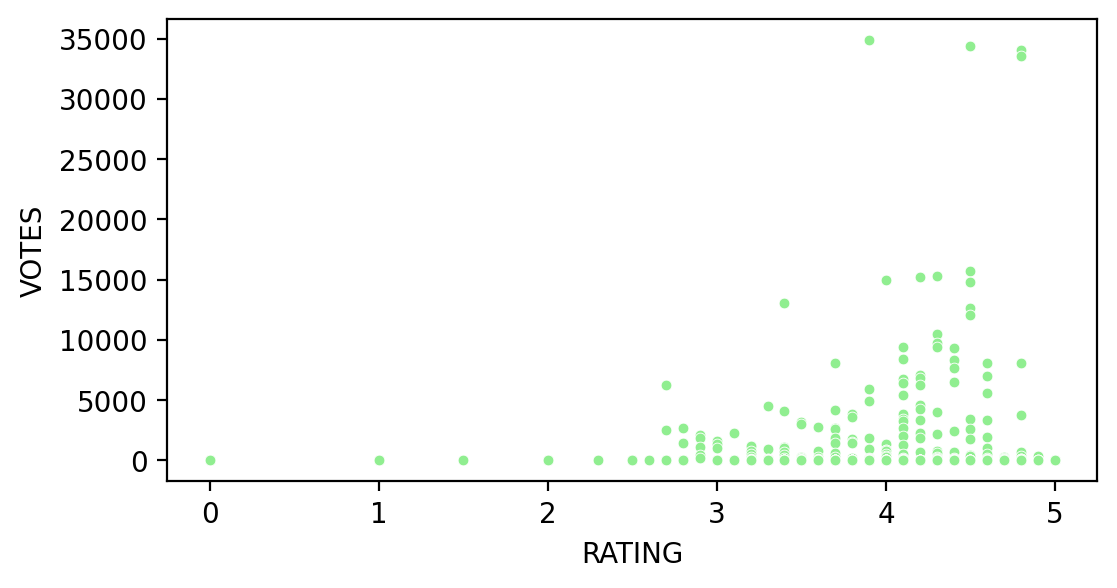

In [6]:
plt.figure(dpi = 200, figsize = (6, 3))
sns.scatterplot(data = fandango, x = 'RATING', y = 'VOTES', s = 15, color = 'lightgreen')

In [7]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [11]:
fandango['YEAR'] = fandango['FILM'].apply(lambda x: int(str(x).split("(")[-1].replace(")", '')))

In [12]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


**Сколько фильмов содержится в наборе данных Fandango, в разбивке по годам?**

In [16]:
fandango['YEAR'].value_counts()
#fandango.groupby('YEAR').count().sort_values('FILM', ascending = False)['FILM']

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

**Визуализирем количество фильмов в год с помощью графика:**

<Axes: xlabel='YEAR', ylabel='count'>

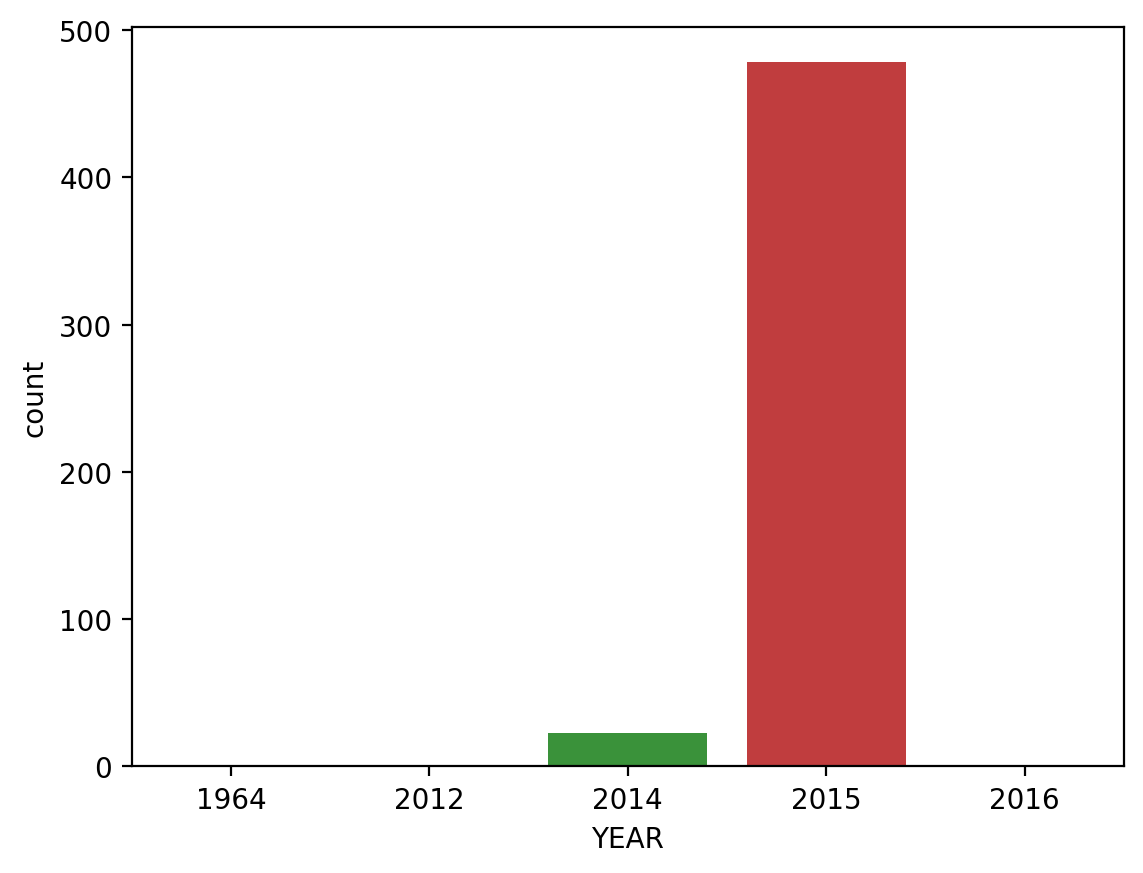

In [29]:
plt.figure(dpi = 200) 
sns.countplot(data = fandango, x = 'YEAR' )


**Какие 10 фильмов получили наибольшее количество голосов (votes)?**

In [30]:
fandango.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**Сколько фильмов имеет нулевое количество голосов (votes)?**

In [13]:
fandango[fandango['VOTES'] == 0].shape[0]

69

**Создадим DataFrame только с теми фильмами, которые имеют голоса (votes)**

In [31]:
fd_voted = fandango[fandango['VOTES'] != 0]
fd_voted

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


----

**Из-за особенностей отображения рейтингов в виде звёзд на страницах HTML, истинные рейтинги пользователей могут немного отличаться от рейтингов, которые показываются пользователю. Давайте визуализируем эту разницу распределений.**


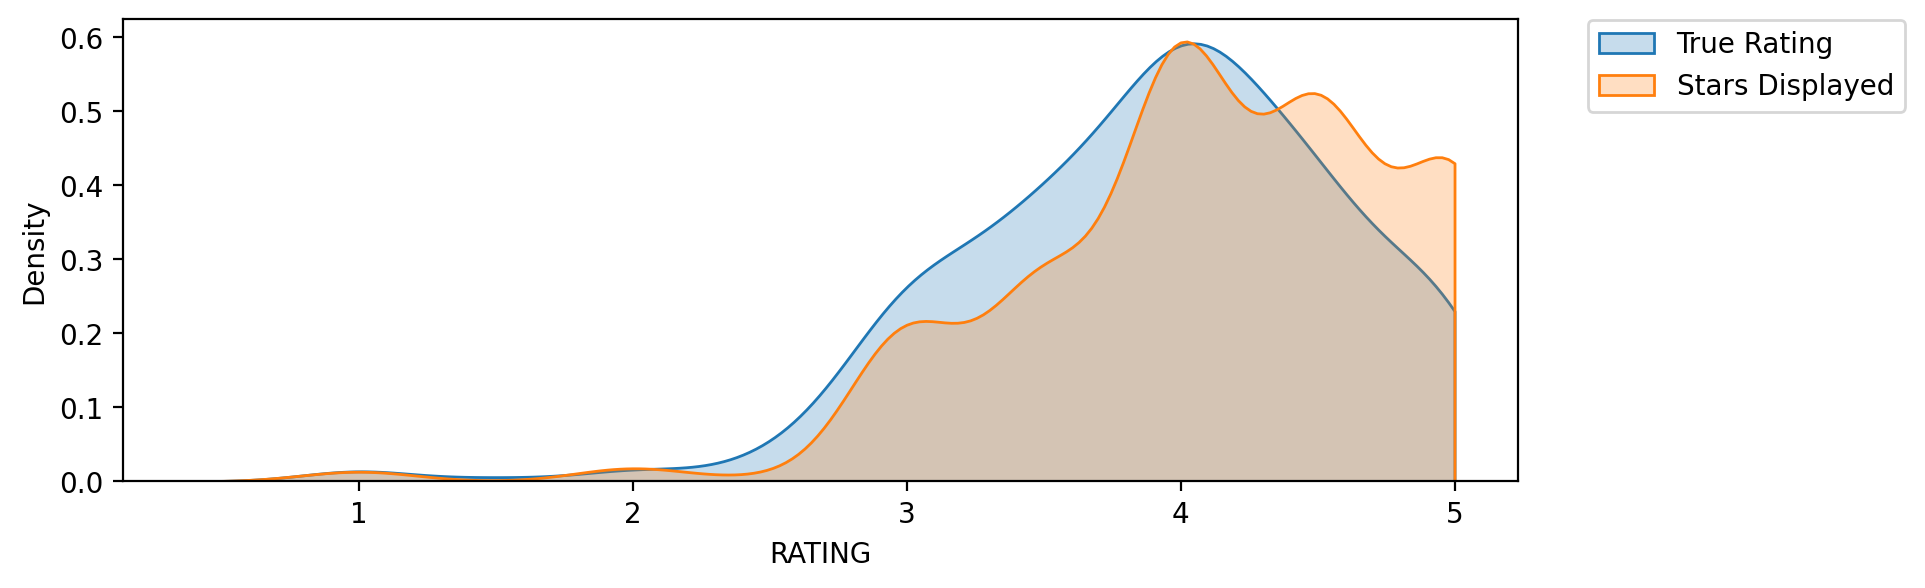

In [32]:
plt.figure(dpi = 200, figsize = (9, 3))
sns.kdeplot(data = fd_voted['RATING'], fill = True, label = 'True Rating', clip = [0, 5])
sns.kdeplot(data = fd_voted['STARS'], fill = True, label = 'Stars Displayed', clip = [0, 5])
plt.legend(loc = (1.05, 0.8))

**Создадим новую колонку с разницей между колонками STARS и RATING**

In [33]:
fd_voted.loc[:,'STARS_DIFF'] = (fd_voted['STARS'] - fd_voted['RATING']).apply(lambda x: round(abs(x), 2))
fd_voted

C:\Users\Anya\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**Сколько раз встречается то или иное значение разницы между STAR и RATING:**

<Axes: xlabel='STARS_DIFF', ylabel='count'>

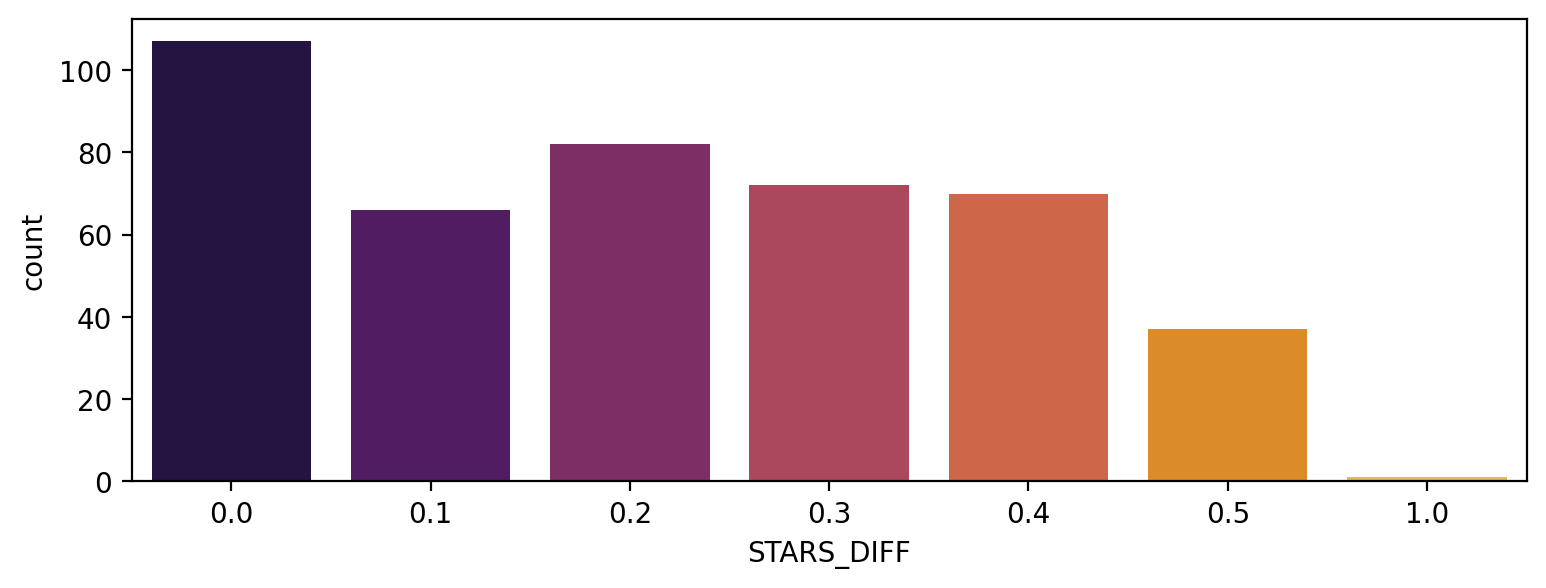

In [34]:
plt.figure(dpi = 200, figsize = (9, 3))
sns.countplot(data = fd_voted, x = 'STARS_DIFF',  palette = 'inferno')

**На этом графике мы видим, что один из фильмов имеет разницу в 1 звезду между отображаемым рейтингом и истинным рейтингом!**

In [35]:
fd_voted.loc[fd_voted['STARS_DIFF'] == 1.0]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Часть 3: Сравнение рейтингов Fandango с рейтингами других компаний

Давайте посмотрим, как рейтинги Fandango соотносятся с рейтингами других компаний.


In [36]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [37]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [38]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [39]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Рейтинги от Rotten Tomatoes

Начнём с рейтингов Rotten Tomatoes. Здесь два набора рейтингов - рейтинги, опубликованные официальными критиками, и пользовательские рейтинги. 

**Построим график, изображающий для Rotten Tomatoes связь между рейтингами от критиков и пользовательскими рейтингами.**

(0.0, 100.0)

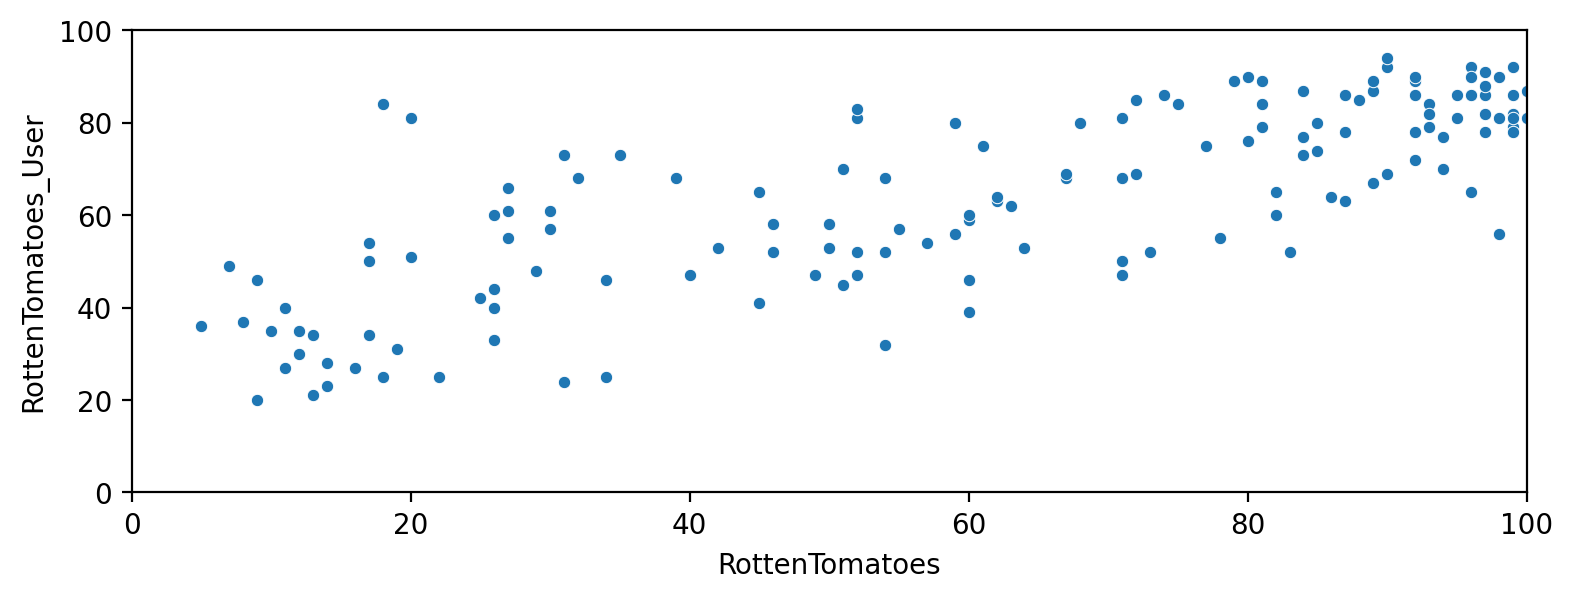

In [40]:
plt.figure(dpi = 200, figsize = (9, 3))
g = sns.scatterplot(data = all_sites, x = 'RottenTomatoes', y = 'RottenTomatoes_User', s = 20)
g.set_xlim(0, 100)
g.set_ylim(0, 100)

Давайте изучим численную разницу между этими двумя рейтингами. Мы посчитаем эту разницу с помощью формулы RottenTomatoes-RottenTomatoes_User. Полученные значения Rotten_Diff - это рейтинг критиков минус рейтинг пользователей. Близкие к нулю значения говорят о том, что критики и пользователи согласны друг с другом. Большие положительные значения - когда критики оценили фильм намного выше, чем пользователи. А большие отрицательные значения - наоборот, пользователи оценили фильм намного выше, чем критики.


In [41]:
all_sites.loc[:,'Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


Теперь давайте посчитаем среднее значение полученной разницы по всему набору данных. Поскольку разница может быть как положительной, так и отрицательной, то давайте сначала возьмём абсолютные величины всех значений, и только после этого посчитаем среднее значение. Таким образом мы получим среднее значение абсолютной разницы между рейтингами от критиков и пользовательскими рейтингами.

In [42]:
np.mean(all_sites.loc[:,'Rotten_Diff'].apply('abs'))

15.095890410958905

Text(0.5, 1.0, 'RT Critics Score Minus RT Users Score')

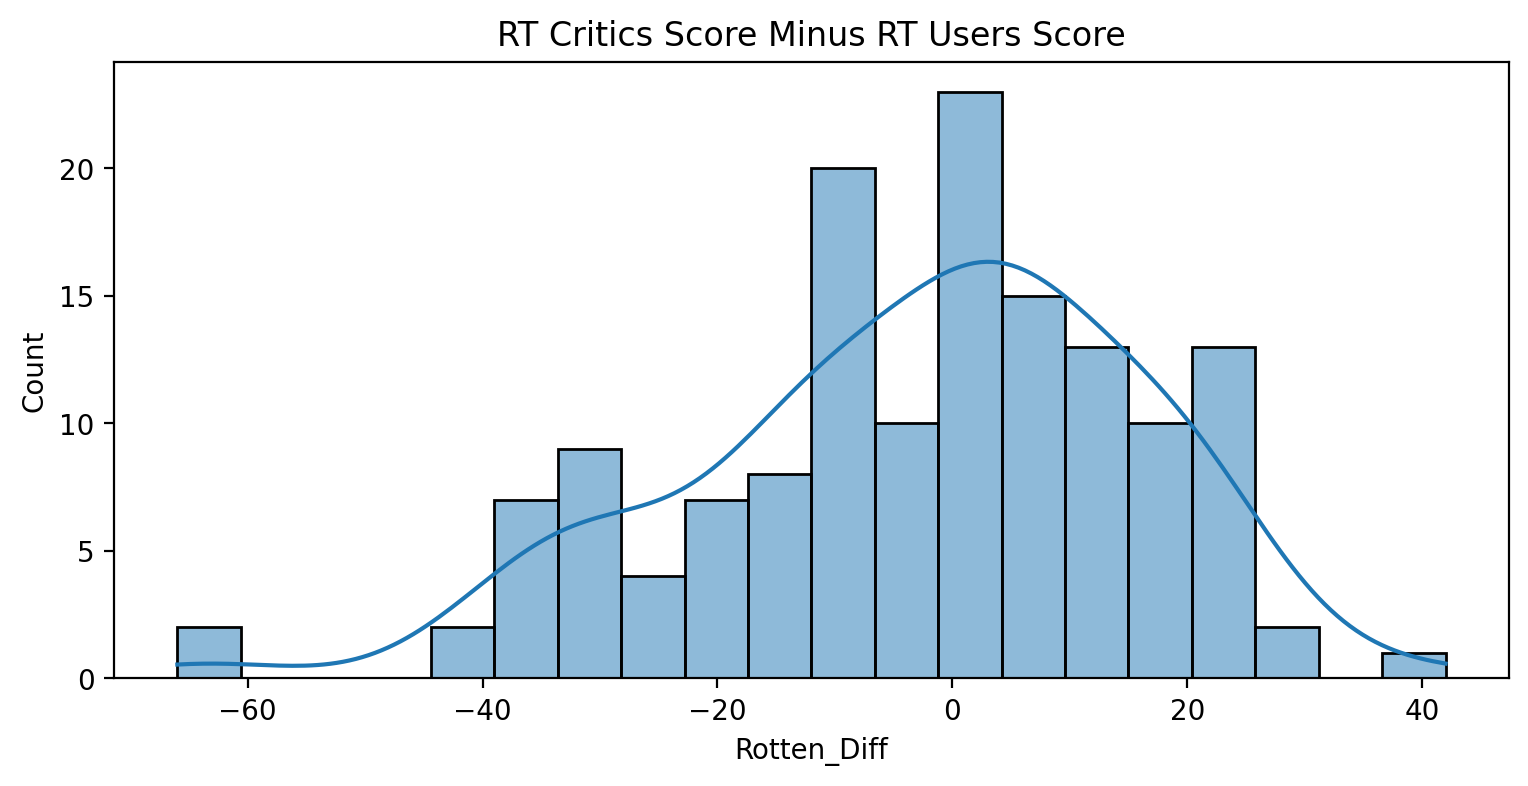

In [43]:
plt.figure(dpi = 200, figsize = (9, 4))
graph = sns.histplot(data = all_sites, x = 'Rotten_Diff', kde = True, bins = 20)
graph.set_title('RT Critics Score Minus RT Users Score')

**Построим график распределения *абсолютных значений* разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes.**

Text(0.5, 1.0, 'Abs Difference RT Critics Score Minus RT Users Score')

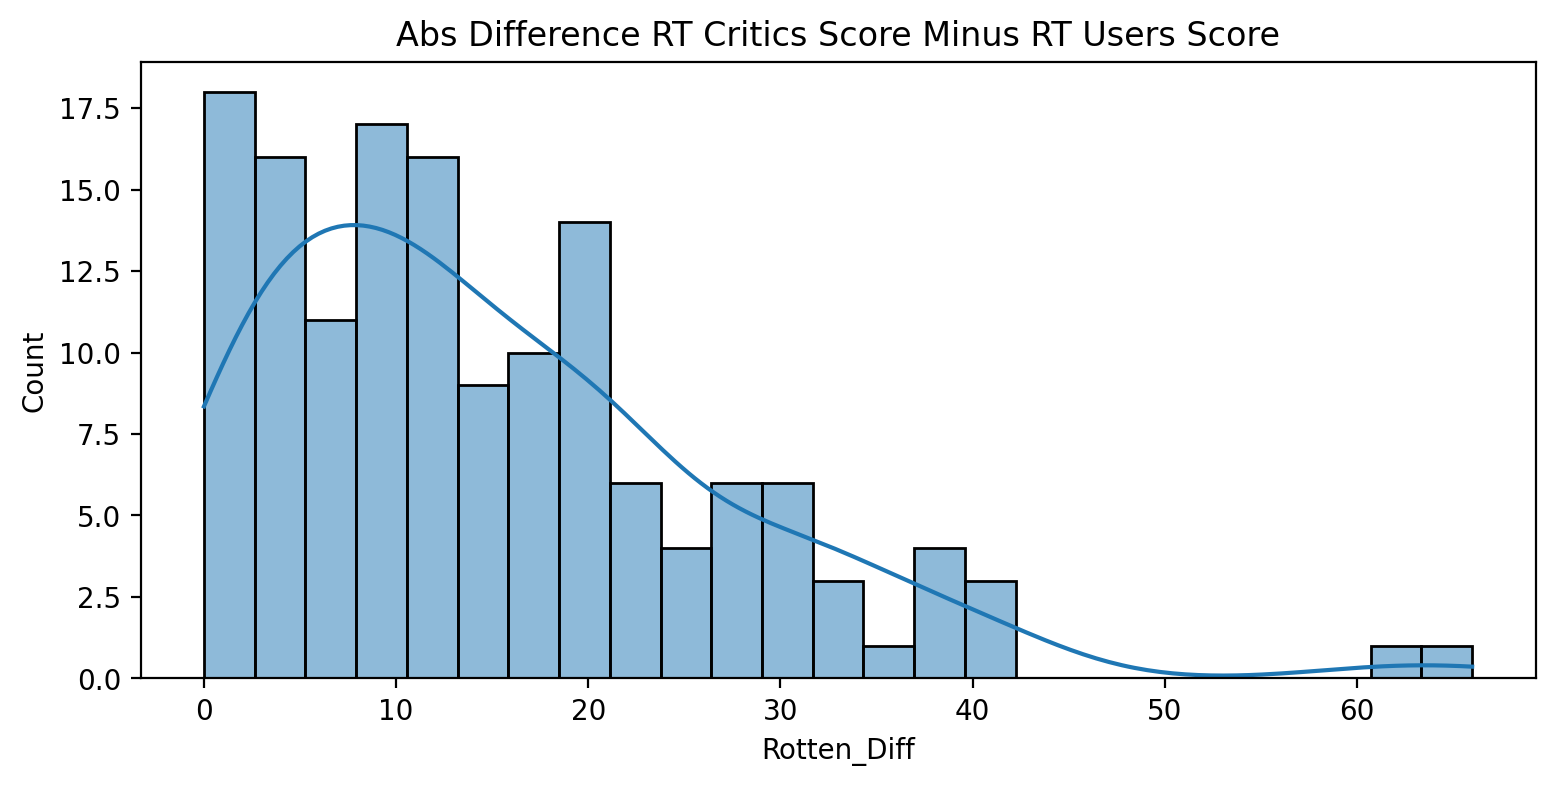

In [45]:
plt.figure(dpi = 200, figsize = (9, 4))
graph = sns.histplot(data = all_sites['Rotten_Diff'].apply('abs'), kde = True, bins = 25)
graph.set_title('Abs Difference RT Critics Score Minus RT Users Score')

**Давайте выясним, какие фильмы наиболее отличаются по рейтингам. Сначала выведите 5 фильмов с наибольшей по модулю *отрицательной* разницей рейтингов. Поскольку мы вычисляли разницу рейтингов по формуле Critics Rating - Users Rating, большие по модулю отрицательные значения говорят о том, что пользователи в среднем оценили эти фильмы намного выше, чем критики.**

**Какие 5 фильмов в среднем были выше всего оценены пользователями, по сравнению с оценками от критиков:**

In [46]:
all_sites.loc[:, ['FILM', 'Rotten_Diff']].sort_values('Rotten_Diff')[:5]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


**Далее наоборот - 5 фильмов, которые в среднем были выше всего оценены критиками, по сравнению с оценками от пользователей.**

In [47]:
all_sites.loc[:, ['FILM', 'Rotten_Diff']].sort_values('Rotten_Diff', ascending = False)[:5]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


## Рейтинги от MetaCritic

Далее давайте быстро взглянем на рейтинги от MetaCritic. Они тоже отображают два типа рейтингов - как свои официальные рейтинги, так и пользовательские рейтинги.

(0.0, 10.0)

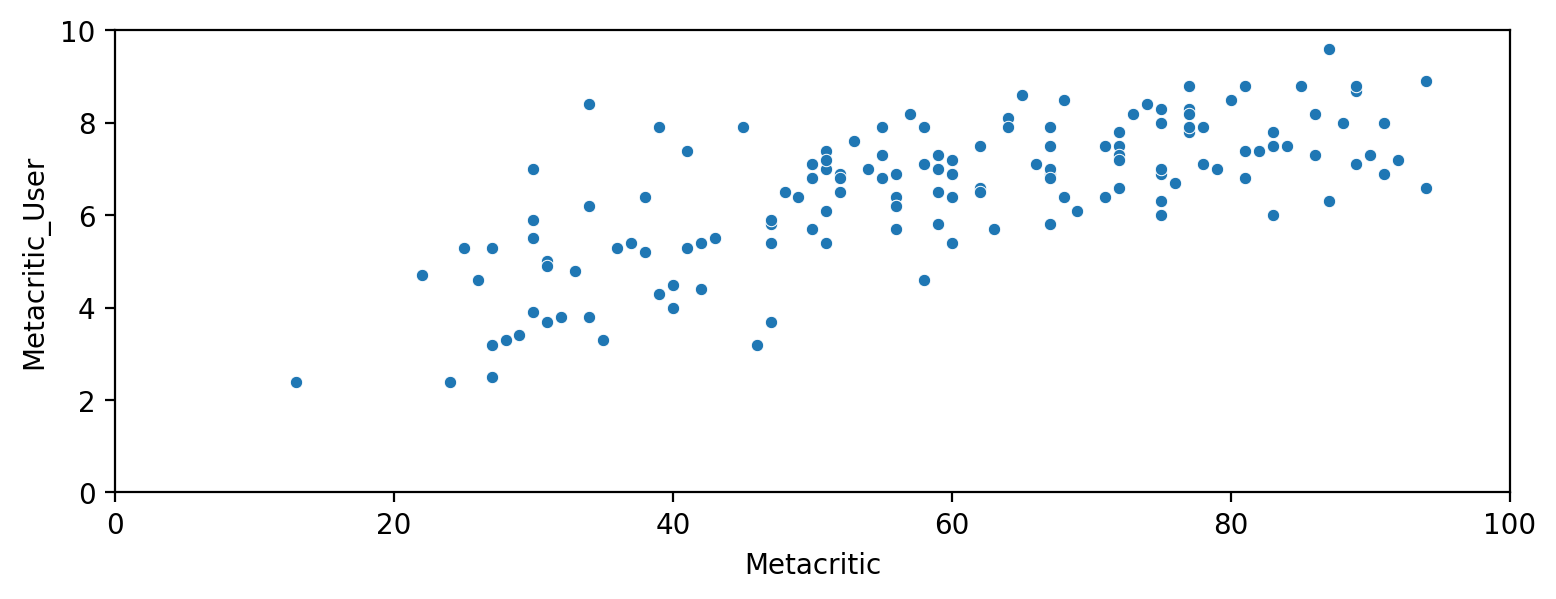

In [48]:
plt.figure(dpi = 200, figsize = (9, 3))
graph = sns.scatterplot(data = all_sites, x = 'Metacritic', y = 'Metacritic_User', s = 20)
graph.set_xlim(0, 100)
graph.set_ylim(0, 10)

## Рейтинги от IMDB

И наконец, посмотрим на рейтинги от IMDB. Обратите внимание, что Metacritic и IMDB показывают количество голосов. Посмотрим на наиболее популярные фильмы.


<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

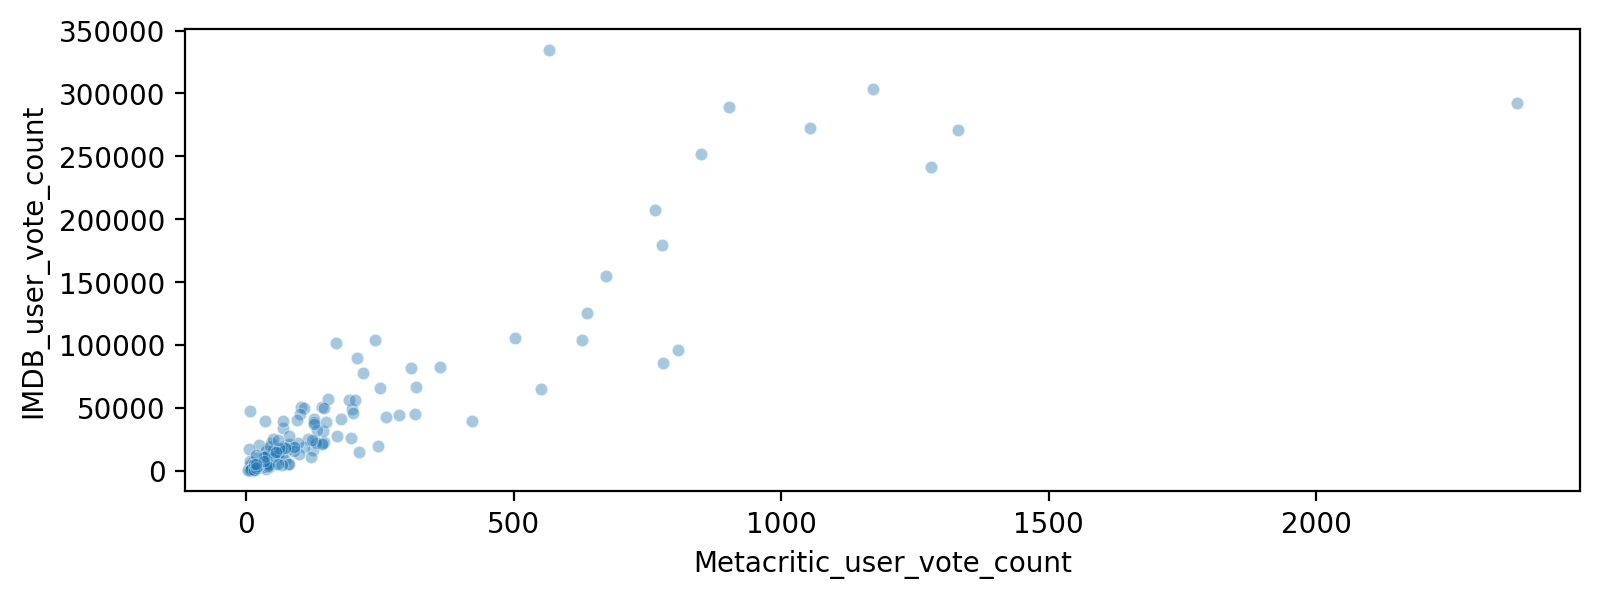

In [51]:
plt.figure(dpi = 200, figsize = (9, 3))
sns.scatterplot(data = all_sites, x = 'Metacritic_user_vote_count', y = 'IMDB_user_vote_count', s = 20, alpha = 0.4)


**Здесь мы видим два "выброса" - точки, очень сильно отличающиеся от всех других точек. Один фильм получил наибольшее количество голосов на IMDB, но только 500 голосов на Metacritic.**

**Какой фильм получил наибольшее количество голосов на IMDB?**

In [52]:
all_sites.loc[all_sites['IMDB_user_vote_count'].idxmax()]

FILM                          The Imitation Game (2014)
RottenTomatoes                                       90
RottenTomatoes_User                                  92
Metacritic                                           73
Metacritic_User                                     8.2
IMDB                                                8.1
Metacritic_user_vote_count                          566
IMDB_user_vote_count                             334164
Rotten_Diff                                          -2
Name: 14, dtype: object

**Какой фильм получил наибольшее количество голосов на Metacritic?**

In [53]:
all_sites.loc[all_sites['Metacritic_user_vote_count'].idxmax()]

FILM                          Mad Max: Fury Road (2015)
RottenTomatoes                                       97
RottenTomatoes_User                                  88
Metacritic                                           89
Metacritic_User                                     8.7
IMDB                                                8.3
Metacritic_user_vote_count                         2375
IMDB_user_vote_count                             292023
Rotten_Diff                                           9
Name: 88, dtype: object

## Сравнение рейтингов Fandango с рейтингами других компаний

Давайте наконец выясним, являлись ли рейтинги Fandango искусственно завышенными, чтобы продавать больше билетов.

**Объединим таблицу fandango с таблицей all_sites. Не каждый фильм в таблице Fandango найдётся в таблице all_sites, потому что некоторые фильмы Fandango имеют очень мало отзывов или вообще не имеют отзывов. Но мы хотим сравнивать только те фильмы, которые есть в обеих таблицах.**

In [54]:
merged_films = pd.merge(fandango, all_sites, how = 'inner', on = 'FILM')
merged_films.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    int64  
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(8), object(1)


In [55]:
merged_films.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


### Нормализация колонок до диапазона 0-5 в соответствии с колонками STARS и RATINGS от Fandango

Обратите внимание, что компании Rotten Tomatoes, Metacritic и IMDB используют другую шкалу измерения рейтингов, чем шкала от 0 до 5 звезд в Fandango. Чтобы выполнить сравнения, нам нужно *нормализовать* эти значения, чтобы они попадали с диапазон от 0 до 5 звёзд.

In [159]:
merged_films.describe()

,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_normalized,RTU_normalized,MC_normalized,MCU_normalized,IMDB_normalized
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,4.086207,3.841379,3817.696552,2014.882759,60.634483,63.696552,58.696552,6.508966,6.729655,184.489655,42572.186207,-3.062069,3.033103,3.388966,3.121379,3.388276,3.369655
std,0.541169,0.502437,6368.668671,0.322823,30.161098,19.974749,19.538183,1.510883,0.957944,317.361740,67558.506121,19.218488,1.509095,1.064850,1.038641,0.789823,0.477744
min,3.000000,2.700000,35.000000,2014.000000,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000,-66.000000,0.200000,1.100000,0.700000,1.200000,2.000000
25%,3.500000,3.500000,218.000000,2015.000000,31.000000,50.000000,43.000000,5.700000,6.300000,33.000000,5626.000000,-14.000000,1.600000,2.700000,2.300000,3.000000,3.200000
50%,4.000000,3.900000,1430.000000,2015.000000,63.000000,66.000000,59.000000,6.800000,6.900000,72.000000,18986.000000,0.000000,3.200000,3.500000,3.100000,3.500000,3.400000
75%,4.500000,4.200000,4279.000000,2015.000000,89.000000,81.000000,75.000000,7.500000,7.400000,167.000000,44711.000000,11.000000,4.400000,4.300000,4.000000,3.900000,3.700000
max,5.000000,4.800000,34846.000000,2015.000000,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000,42.000000,5.000000,5.000000,5.000000,5.000000,4.300000


In [60]:
merged_films.loc[:, 'RT_normalized'] = merged_films.loc[:, 'RottenTomatoes']\
.apply(lambda x: np.round(5*x/100, 1))
merged_films.loc[:, 'RTU_normalized'] = merged_films.loc[:, 'RottenTomatoes_User']\
.apply(lambda x: np.round(5*x/100, 1))

In [61]:
merged_films.loc[:, 'MC_normalized'] = merged_films.loc[:, 'Metacritic']\
.apply(lambda x: np.round(5*x/100, 1))
merged_films.loc[:, 'MCU_normalized'] = merged_films.loc[:, 'Metacritic_User']\
.apply(lambda x: np.round(5*x/10, 1))

In [62]:
merged_films.loc[:, 'IMDB_normalized'] = merged_films.loc[:, 'IMDB']\
.apply(lambda x: np.round(5*x/10, 1))
merged_films.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_normalized,RTU_normalized,MC_normalized,MCU_normalized,IMDB_normalized
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


**Создадим DataFrame с названием norm_scores, в котором будут только нормализованные рейтинги, а также колонки STARS и RATING из исходной таблицы fandango.**

In [63]:
norm_scores = pd.DataFrame(merged_films[['STARS', 'RATING', 'RT_normalized', 'RTU_normalized', 'MC_normalized', 'MCU_normalized','IMDB_normalized']])

In [64]:
norm_scores

,STARS,RATING,RT_normalized,RTU_normalized,MC_normalized,MCU_normalized,IMDB_normalized
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,4.0,3.6,4.8,4.0,4.4,3.2,3.5
142,4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,4.0,3.9,4.8,4.3,4.3,3.6,3.7


### Сравнение распределений рейтингов от разных компаний


А теперь момент истины! Действильно ли Fandango показывал неоправданно высокие рейтинги? Мы уже знаем, что отображаемые значения RATING были выше значений STARS. Но являются ли сами рейтинги в среднем более высокими, чем у других компаний?


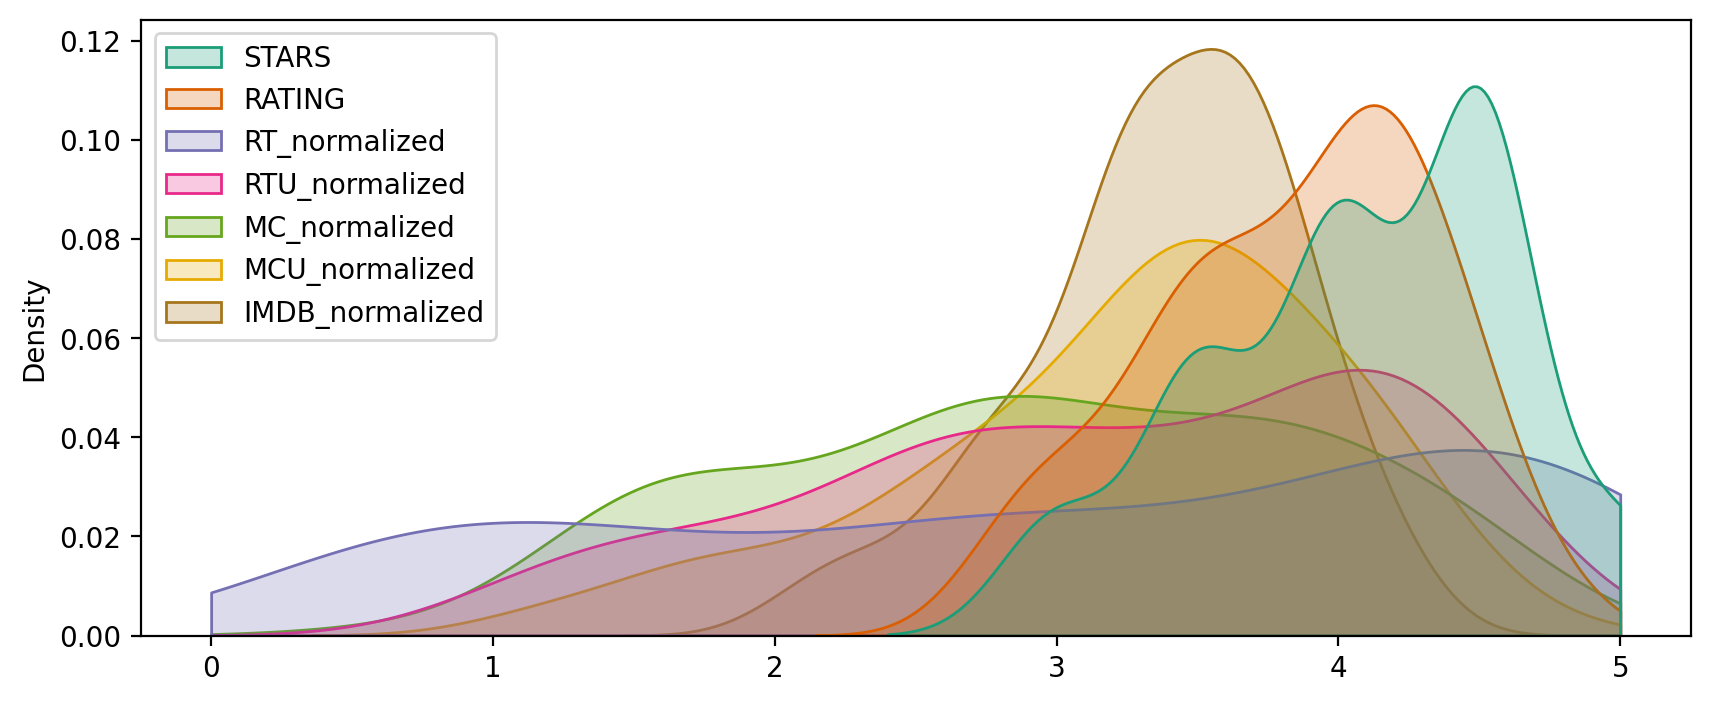

In [98]:
fig, ax_graph = plt.subplots(dpi = 200, figsize = (10, 4))
graph = sns.kdeplot(data = norm_scores, fill = True, clip = [0,5], ax = ax_graph, palette = 'Dark2')
ax_graph.legend(handles = ax_graph.legend_.legend_handles,\
                labels = [t.get_text() for t in ax_graph.legend_.get_texts()], loc = 'upper left')

**Мы сразу видим, что рейтинги Fandango очень сдвинуты справо. Интересно также, что рейтинги RT от критиков имеют очень пологое распределение. Давайте сравним только эти два распределения.** 


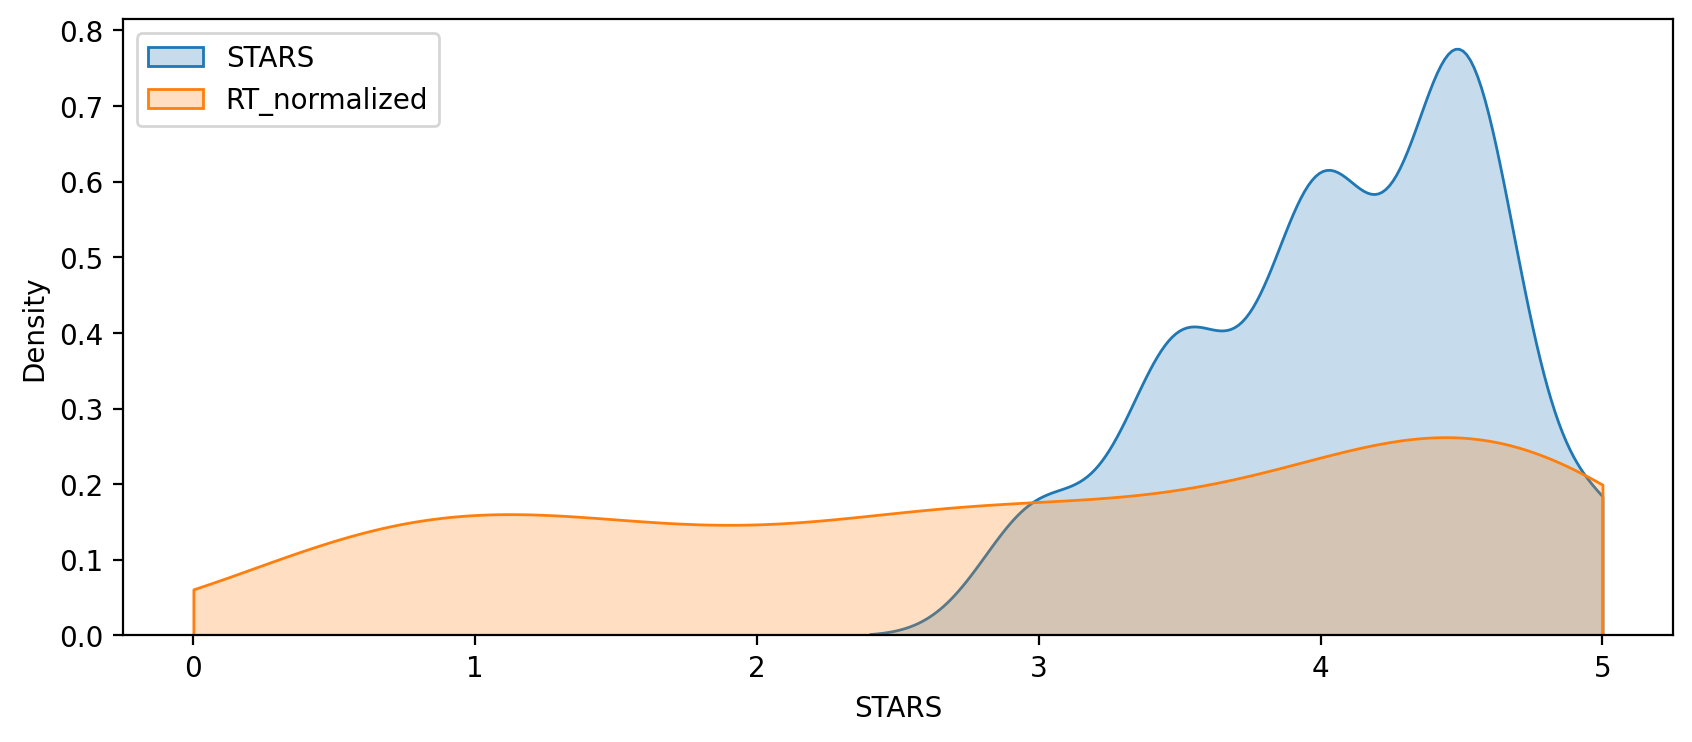

In [167]:
plt.figure(dpi = 200, figsize = (10, 4))

sns.kdeplot(data = norm_scores['STARS'], fill = True, label = 'STARS', clip = [0,5])
sns.kdeplot(data = norm_scores['RT_normalized'], fill = True, label = 'RT_normalized', clip = [0,5])

plt.legend(loc = 'upper left')

<Axes: ylabel='Count'>

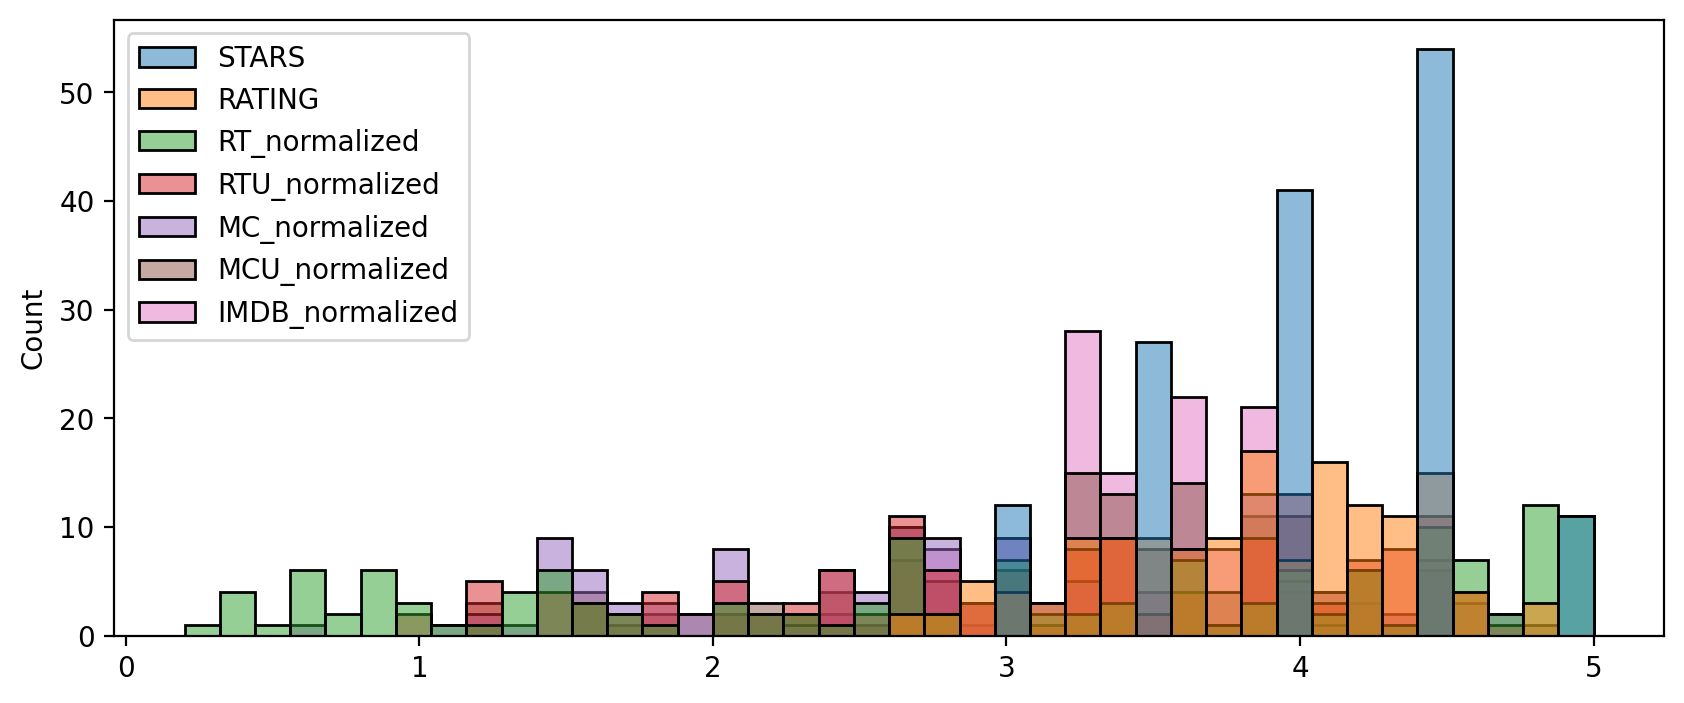

In [107]:
plt.subplots(dpi = 200, figsize = (10, 4))
sns.histplot(data = norm_scores, bins = 40)


### Как различные компании оценивают фильмы с наименьшими рейтингами?

**Построим график clustermap для всех нормализованных рейтингов.**

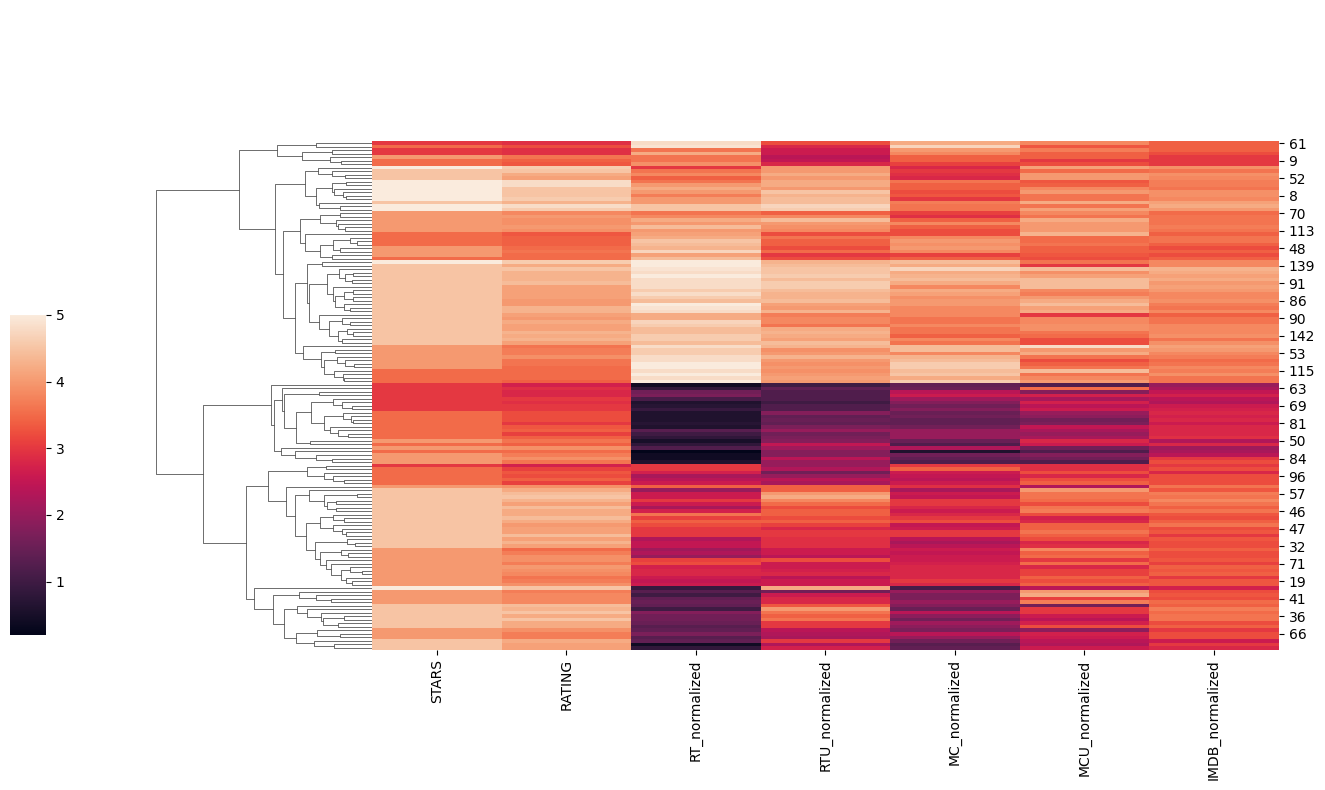

In [108]:
sns.clustermap(norm_scores, col_cluster=False, figsize=(12,8), cbar_pos=(-0.1, .2, .03, .4))

**Мы видели, что рейтинги Fandango явно выше рейтингов других компаний, особенно если смотреть на округлённые вверх значения рейтингов. Давайте посмотрим на 10 фильмов с наихудшими рейтингами по версии Rotten Tomatoes Critic - какие это 10 фильмов? Какие нормализованные рейтинги дали этим фильмам другие компании?**

In [110]:
film_scores = merged_films[['FILM', 'STARS', 'RATING', 'RT_normalized', 'RTU_normalized',\
                            'MC_normalized', 'MCU_normalized','IMDB_normalized']]
film_scores.nsmallest(10, 'RT_normalized')

,FILM,STARS,RATING,RT_normalized,RTU_normalized,MC_normalized,MCU_normalized,IMDB_normalized
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7


**Визуализируем распределение рейтингов от всех компаний для 10 фильмов с наихудшими рейтингами.**

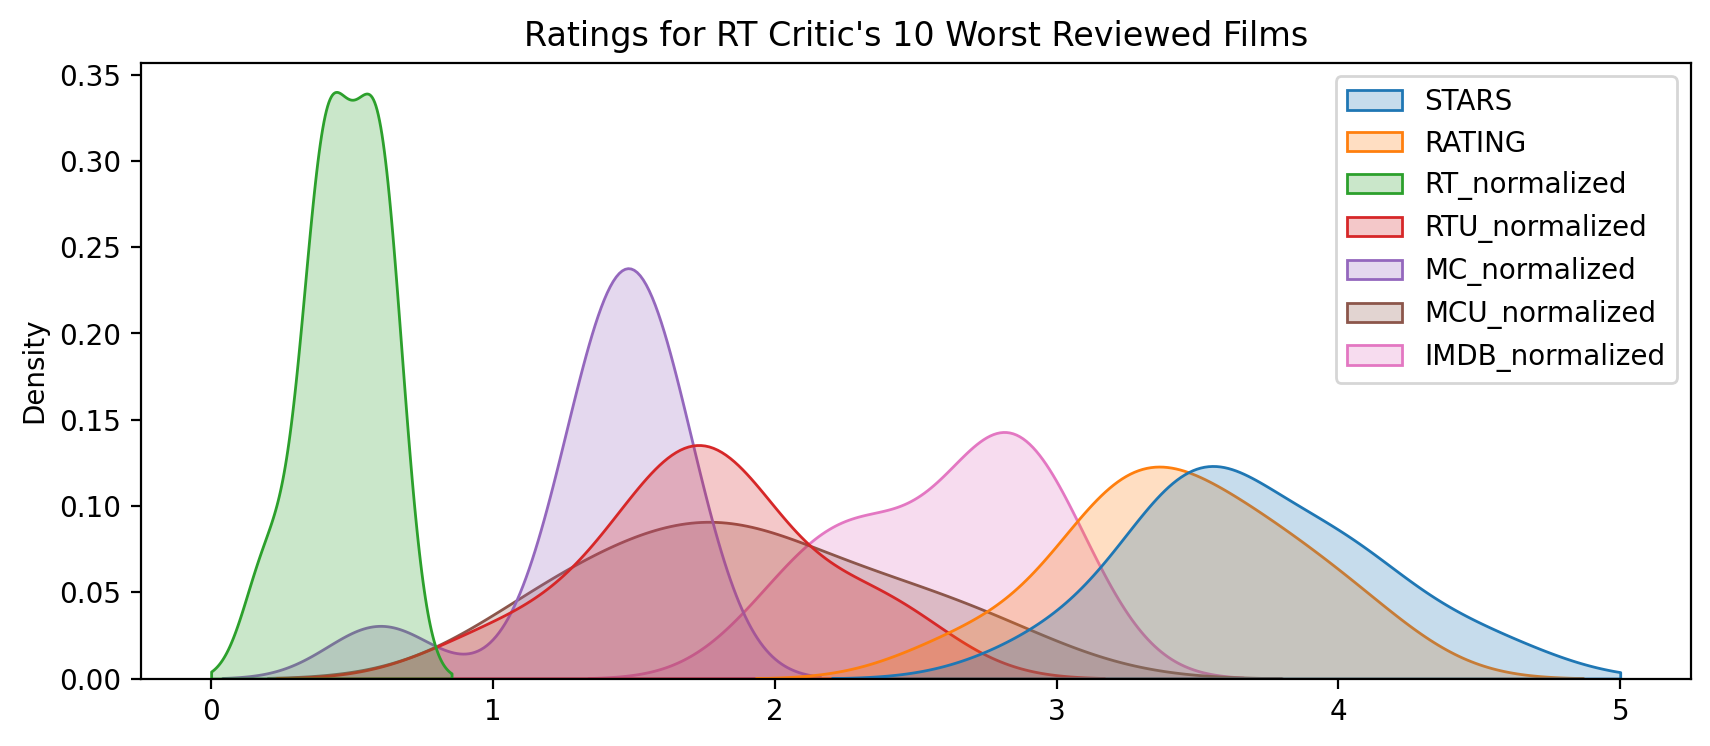

In [116]:
plt.subplots(dpi = 200, figsize = (10, 4))
sns.kdeplot(data = film_scores.nsmallest(10,'RT_normalized').drop(['FILM'], axis = 1), fill = True, clip = [0,5])
plt.title("Ratings for RT Critic's 10 Worst Reviewed Films");

---
----

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">
  
**Выводы: вот это да! Fandango показывал 3-4 звезды для фильмов, которые явно были неудачными!**  
    
**Больше всего отличается фильм [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0) - Fandango дал ему рейтинг 4.5 звёзд, хотя этот фильм получил [средний рейтинг 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) от других компаний!**

----